In [1]:
import pandas as pd
MODALITY = 'asymmetry'
IMPUTE_ID = 'mean_imputed'
SUBSAMPLED_ID = 'not_subsampled'
PARTITIONS_DIR = f"../../results/{MODALITY}/visualizeCCAOnPheno/STAGE00DATA/{IMPUTE_ID}/{SUBSAMPLED_ID}/props"
RESULTS_DIR = f"../../results/{MODALITY}/FUMA gene2func/joinedDatasets/{IMPUTE_ID}/{SUBSAMPLED_ID}"

/opt/anaconda/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def load_df(name):
    df = None
    for par in [1,4,5,6,7]:
        tab = pd.read_csv(f"{RESULTS_DIR}/par{par:02d}/{name}.txt",sep='\t')
        tab['partition'] = par
        if df is None:
            df = tab
        else:
            df = pd.concat([df, tab])
    return df
functions_df = load_df("GS")
deg_df = load_df("gtex_v8_ts_DEG")

In [3]:
functions_df.shape

(647, 9)

In [4]:
functions_df.head()

,Category,GeneSet,N_genes,N_overlap,p,adjP,genes,link,partition
0,GO_bp,GO_MICROTUBULE_CYTOSKELETON_ORGANIZATION,528,10,4.843584e-07,0.003214,TUBA1B:TUBA1A:TUBA1C:CHMP1A:SPIRE2:TUBB3:TUBB3...,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,1
1,GO_bp,GO_MICROTUBULE_BASED_PROCESS,726,11,1.119068e-06,0.003214,TUBA1B:TUBA1A:TUBA1C:RASGRP1:CHMP1A:SPIRE2:TUB...,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,1
2,GO_bp,GO_REGULATION_OF_CELLULAR_COMPONENT_BIOGENESIS,901,12,1.345885e-06,0.003214,TRABD2B:DACT1:THBS1:CHMP1A:CDK10:SPIRE2:DEF8:P...,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,1
3,GO_bp,GO_CYTOSKELETON_ORGANIZATION,1285,14,1.749016e-06,0.003214,TUBA1B:TUBA1A:TUBA1C:FMNL3:DAAM1:CHMP1A:CDK10:...,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,1
4,GO_bp,GO_ORGANELLE_LOCALIZATION,684,10,4.891740e-06,0.007191,TUBA1A:RASGRP1:CHMP1A:SPIRE2:DEF8:PLEKHM1:CRHR...,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,1


In [5]:
functions_df.Category.unique()

array(['GO_bp', 'GWAScatalog', 'Chemical_and_Genetic_pertubation',
       'GO_cc', 'Immunologic_signatures', 'Positional_gene_sets',
       'Wikipathways', 'Curated_gene_sets', 'Oncogenic_signatures',
       'KEGG', 'microRNA_targets', 'TF_targets', 'Reactome',
       'Canonical_Pathways', 'Hallmark_gene_sets', 'GO_mf', 'BioCarta',
       'Cancer_gene_neighborhoods', 'Computational_gene_sets'],
      dtype=object)

In [6]:
functions_df.sort_values('adjP').groupby(['Category','partition']).first()

GeneSet  \
Category                         partition                                                      
BioCarta                         6                            BIOCARTA_AKAPCENTROSOME_PATHWAY   
Cancer_gene_neighborhoods        6                                                 MORF_PTPRR   
Canonical_Pathways               1           REACTOME_ACTIVATION_OF_AMPK_DOWNSTREAM_OF_NMDARS   
                                 6           REACTOME_ACTIVATION_OF_AMPK_DOWNSTREAM_OF_NMDARS   
Chemical_and_Genetic_pertubation 1                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
                                 4                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
                                 5                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
                                 6                     SOTIRIOU_BREAST_CANCER_GRADE_1_VS_3_UP   
                                 7                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
Computational_gene_sets          6                                                 MODULE_198   
Curated_gene_sets                1                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
                                 4                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
                                 5                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
                                 6           REACTOME_ACTIVATION_OF_AMPK_DOWNSTREAM_OF_NMDARS   
                                 7                      NIKOLSKY_BREAST_CANCER_16Q24_AMPLICON   
GO_bp                            1                   GO_MICROTUBULE_CYTOSKELETON_ORGANIZATION   
                                 5             GO_REGULATION_OF_CELLULAR_COMPONENT_BIOGENESIS   
                                 6          GO_CYTOSKELETON_DEPENDENT_INTRACELLULAR_TRANSPORT   
GO_cc                            1                                GO_MICROTUBULE_CYTOSKELETON   
                                 5                                GO_MICROTUBULE_CYTOSKELETON   
                                 6                                             GO_MICROTUBULE   
GO_mf                            5                            GO_CYTOSKELETAL_PROTEIN_BINDING   
                                 6                               GO_GUANYL_NUCLEOTIDE_BINDING   
GWAScatalog                      1                             Red vs. brown/black hair color   
                                 4             Handedness (Right-handed vs. non-right-handed)   
                                 5                                      Male-pattern baldness   
                                 6               Handedness (Left-handed vs. non-left-handed)   
                                 7             Handedness (Right-handed vs. non-right-handed)   
Hallmark_gene_sets               5                                      HALLMARK_ADIPOGENESIS   
Immunologic_signatures           1          GSE24634_IL4_VS_CTRL_TREATED_NAIVE_CD4_TCELL_D...   
                                 4          GSE17974_IL4_AND_ANTI_IL12_VS_UNTREATED_2H_ACT...   
                                 6                             GSE12366_GC_VS_MEMORY_BCELL_UP   
KEGG                             1                 KEGG_PATHOGENIC_ESCHERICHIA_COLI_INFECTION   
                                 6                 KEGG_PATHOGENIC_ESCHERICHIA_COLI_INFECTION   
Oncogenic_signatures             1                                            ATF2_S_UP.V1_DN   
                                 5                                     KRAS.PROSTATE_UP.V1_DN   
Positional_gene_sets             1                                                   chr16q24   
                                 4                                                   chr16q24   
                                 5                                                   chr16q24   
                                 6                                                   chr12q13   
            

In [7]:
go_cc_per_partition_df = functions_df.sort_values('adjP').query('(Category=="GO_cc") & (adjP<0.05)').pivot_table(columns='partition', values='adjP',index='GeneSet')
go_mf_per_partition_df = functions_df.sort_values('adjP').query('(Category=="GO_mf") & (adjP<0.05)').pivot_table(columns='partition', values='adjP',index='GeneSet')
go_bp_per_partition_df = functions_df.sort_values('adjP').query('(Category=="GO_bp") & (adjP<0.05)').pivot_table(columns='partition', values='adjP',index='GeneSet')
canonical_pathways_per_partition_df = functions_df.sort_values('adjP').query('(Category=="Canonical_Pathways") & (adjP<0.05)').pivot_table(columns='partition', values='adjP',index='GeneSet')

In [8]:
functions_per_partition_df = functions_df.sort_values('adjP').query('(Category=="GWAScatalog") & (adjP<0.05)').pivot_table(columns='partition', values='adjP',index='GeneSet')
functions_per_partition_df

partition,1,4,5,6,7
GeneSet,,,,,
Alcohol use disorder (total score),1.274981e-07,1.677880e-11,2.045014e-12,1.483805e-12,6.702837e-13
Alzheimer's disease in APOE e4- carriers,3.731101e-04,2.038641e-05,8.412608e-05,7.638447e-06,3.616962e-06
Bipolar disorder,1.380983e-02,NaN,NaN,1.758043e-04,NaN
Blond vs. brown/black hair color,3.096164e-02,4.447542e-02,1.070701e-02,NaN,1.318466e-02
Brown vs. black hair color,2.642386e-04,1.012013e-03,6.329440e-05,3.456817e-02,2.804684e-04
Chronotype,2.426054e-02,NaN,NaN,NaN,NaN
Cognitive ability,NaN,NaN,NaN,4.868617e-02,3.240468e-02
Cognitive function,5.083960e-03,9.827950e-03,1.839249e-06,5.948930e-03,2.874780e-03
Dentate gyrus granule cell layer volume,NaN,NaN,8.412608e-05,NaN,NaN


In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpecFromSubplotSpec
plt.rcParams['font.family'] = 'Serif'
def create_intensity_table_plot(df, color_labels=None):
    vals = np.around(-np.log10(df.values),2)
    if color_labels is None:
        norm = plt.Normalize(np.nanmin(vals), np.nanmax(vals))
        colours = plt.cm.coolwarm(norm(vals))
    else:
        colours = plt.cm.coolwarm(color_labels)
    fig, ax0 = plt.subplots(figsize=(20,3))
    ax0.get_xaxis().set_visible(False)
    ax0.get_yaxis().set_visible(False)
    spec = GridSpecFromSubplotSpec(1,len(df.columns), subplot_spec=ax0,wspace=0,hspace=0)
    colours[np.isnan(vals)] = [1,1,1,1]
    str_vals = [[x if np.isfinite(x) else '' for x in y ] for y in vals]
    the_table=ax0.table(cellText=str_vals, rowLabels=df.index, colLabels=['Partition ' + str(i) for i in df.columns], 
                    loc='bottom', cellLoc='center',
                        cellColours=colours)
    the_table.set_fontsize(20)
    the_table.scale(1, 4)
    for i in range(len(df.columns)):
        ax1 = fig.add_subplot(spec[0,i], xticks=[], yticks=[])
        with Image.open(PARTITIONS_DIR + '/' + str(df.columns[i]) + '.png') as im:
            ax1.imshow(im)
        ax1.get_xaxis().set_visible(False)
        ax1.get_yaxis().set_visible(False)
    plt.subplots_adjust(left=0.2, bottom=0.2)
        
    return fig

/opt/anaconda/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


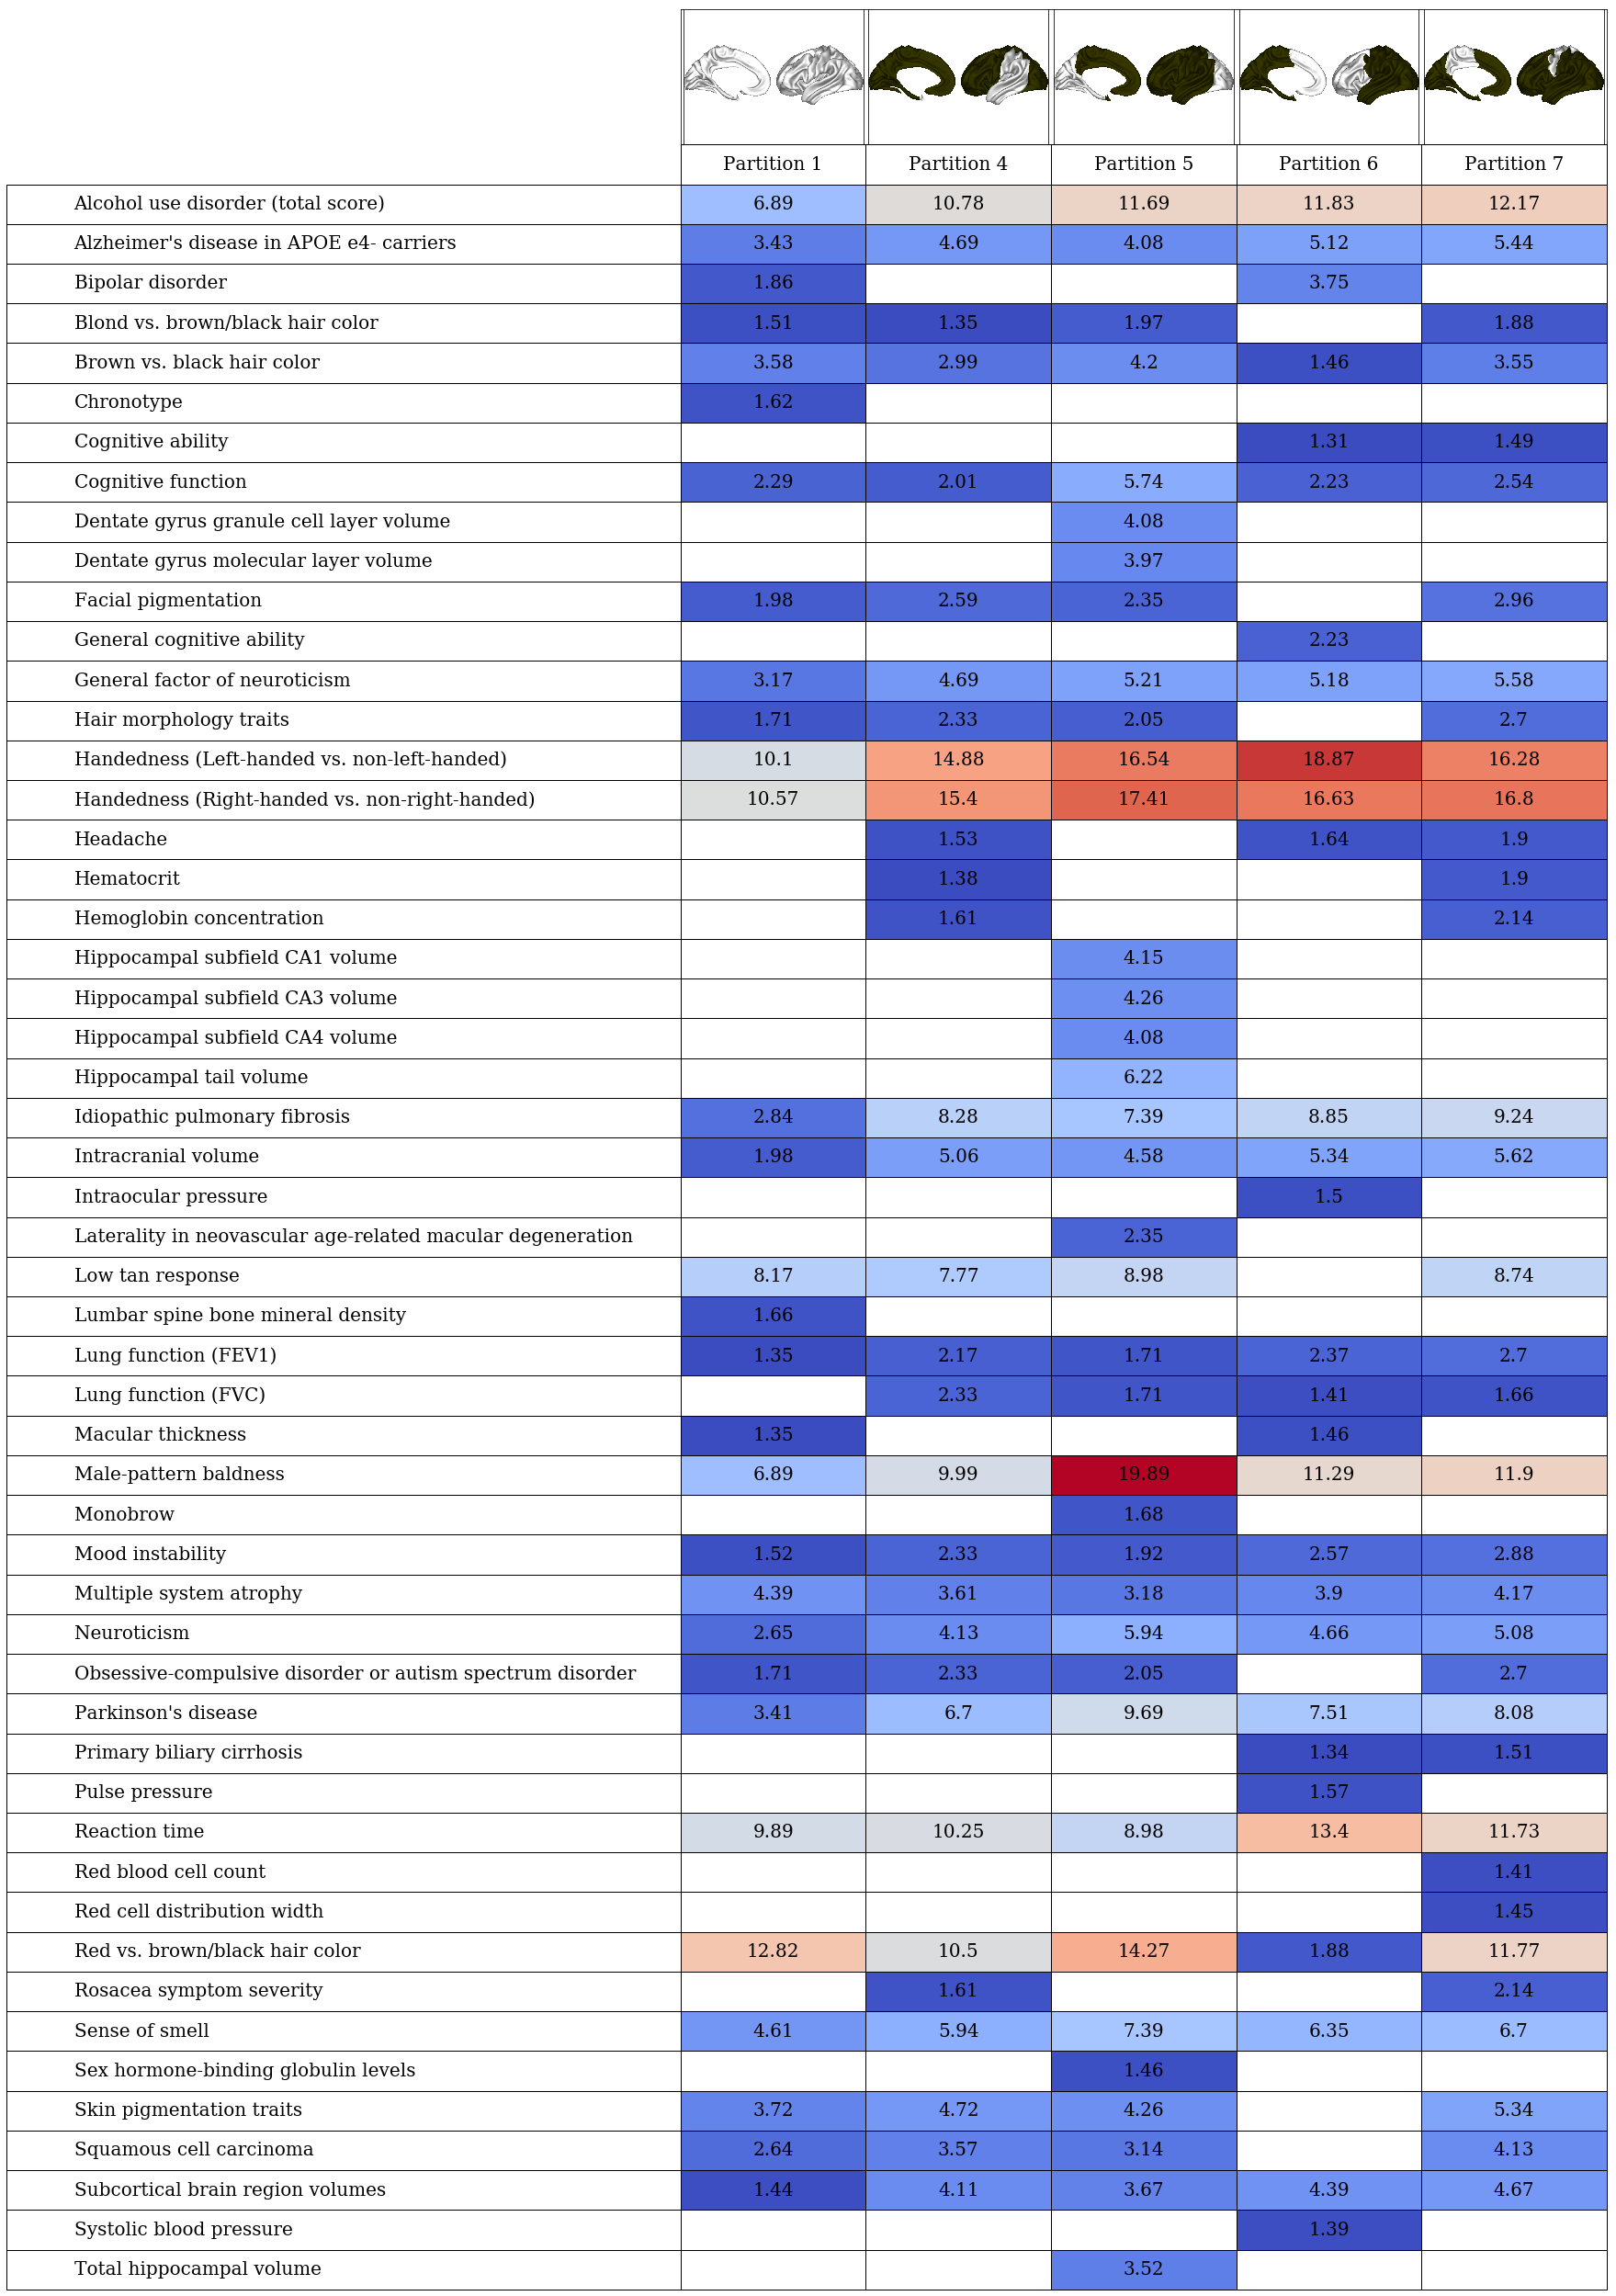

In [10]:
functions_fig = create_intensity_table_plot(functions_per_partition_df)

In [11]:
go_cc_per_partition_df.head()

partition,1,5,6
GeneSet,,,
GO_COLLAGEN_CONTAINING_EXTRACELLULAR_MATRIX,0.043457,NaN,NaN
GO_CYTOPLASMIC_MICROTUBULE,0.005830,NaN,NaN
GO_CYTOSKELETAL_PART,0.006446,NaN,NaN
GO_ENDOPLASMIC_RETICULUM_PART,0.038541,NaN,NaN
GO_EXTRACELLULAR_MATRIX,0.006446,NaN,NaN


/opt/anaconda/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


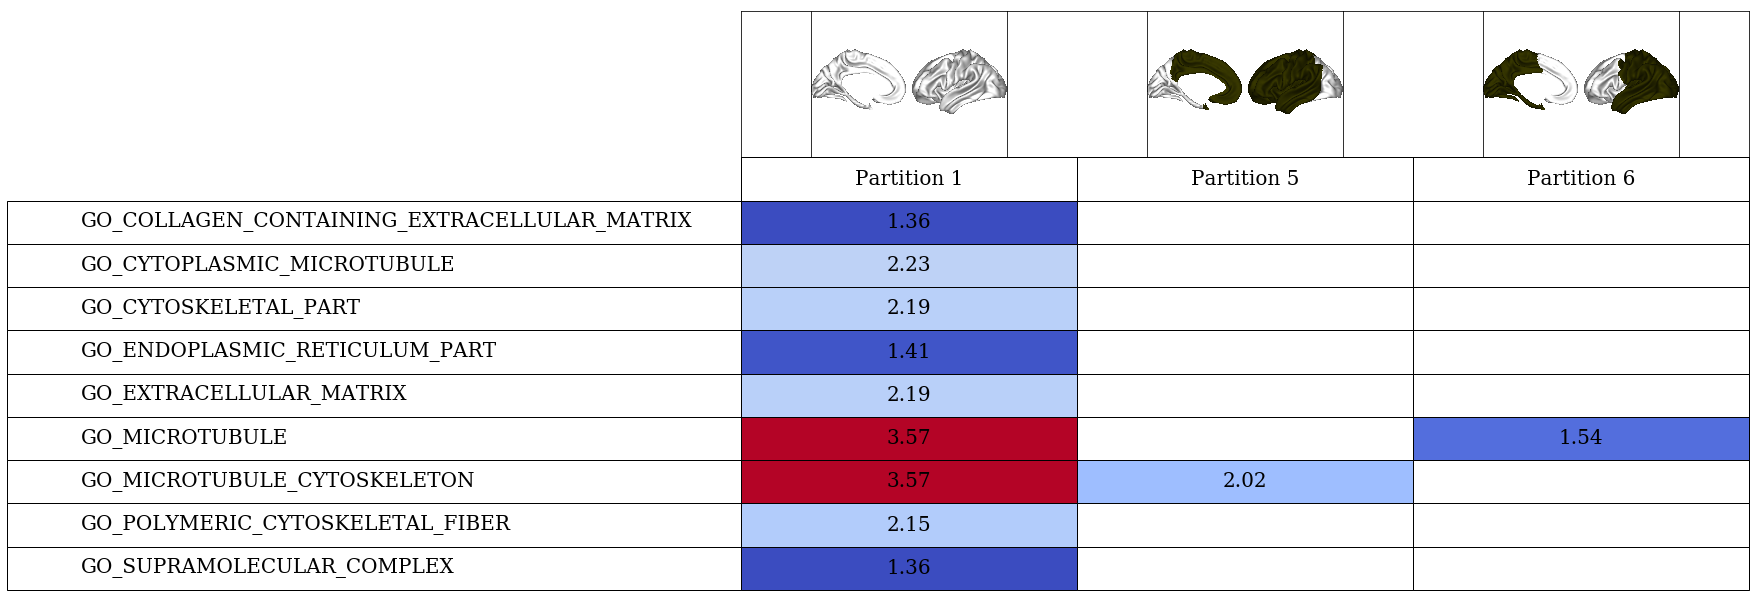

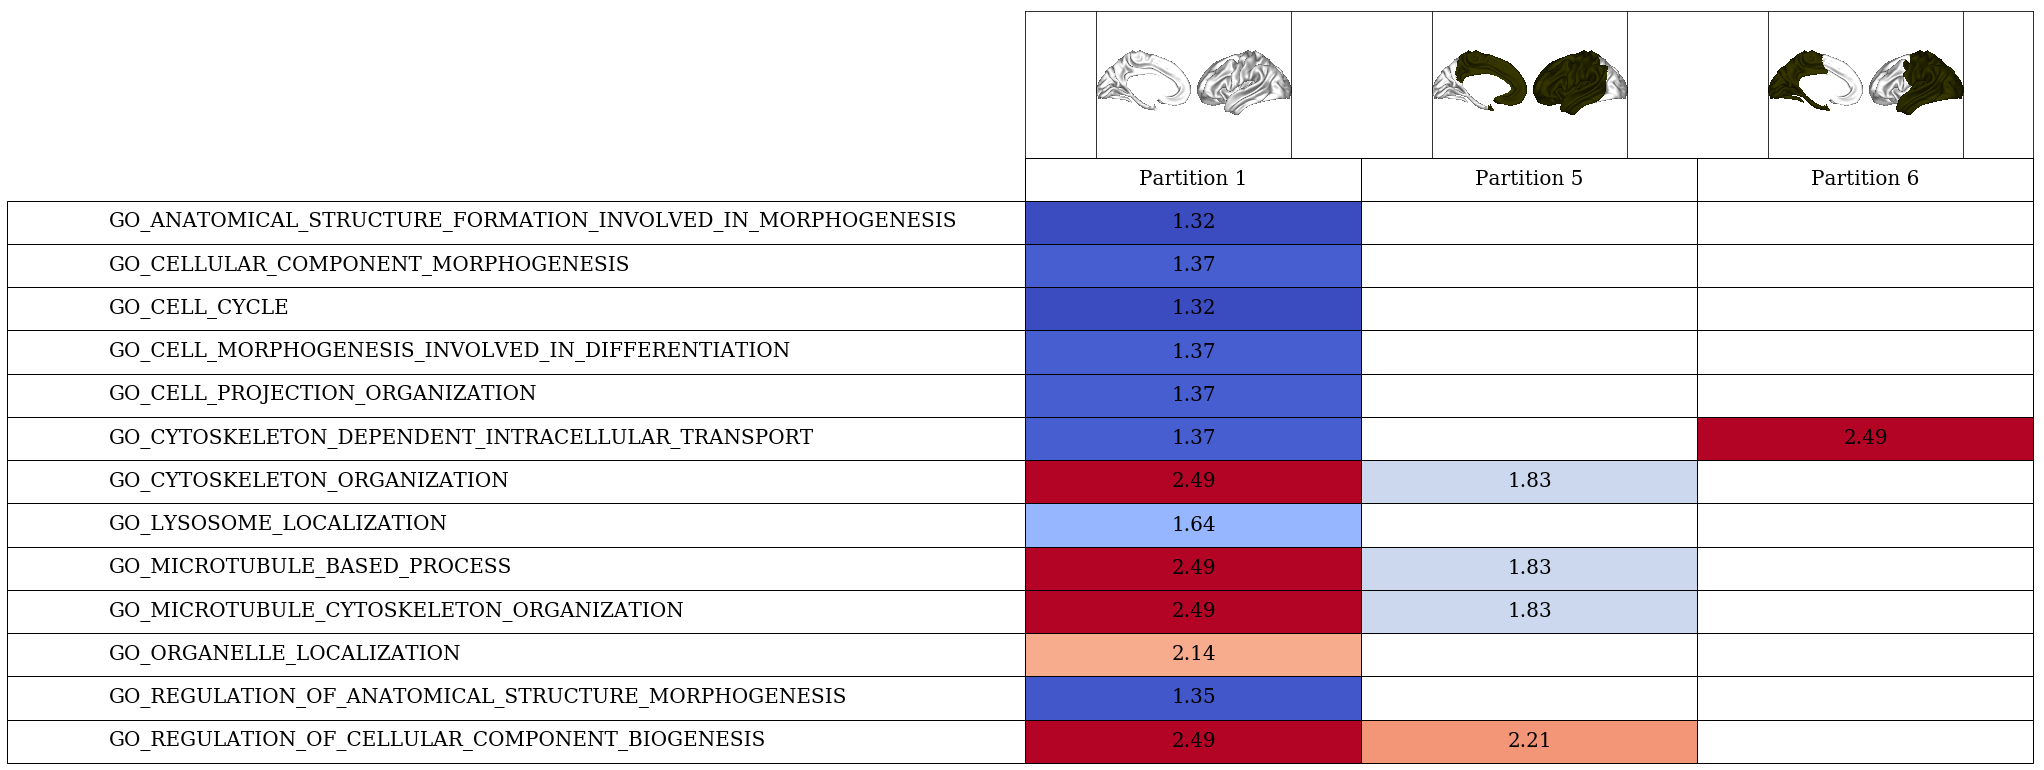

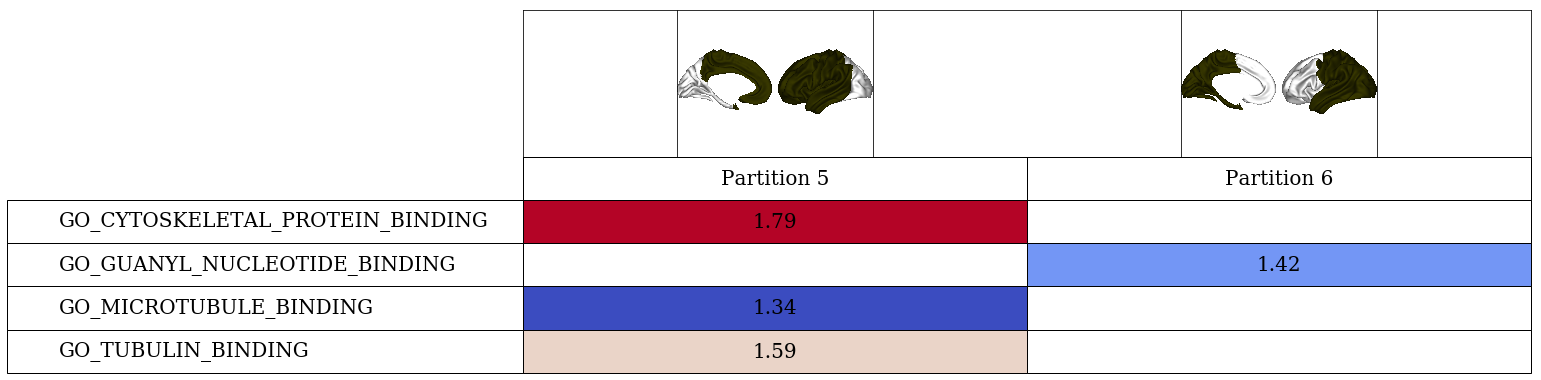

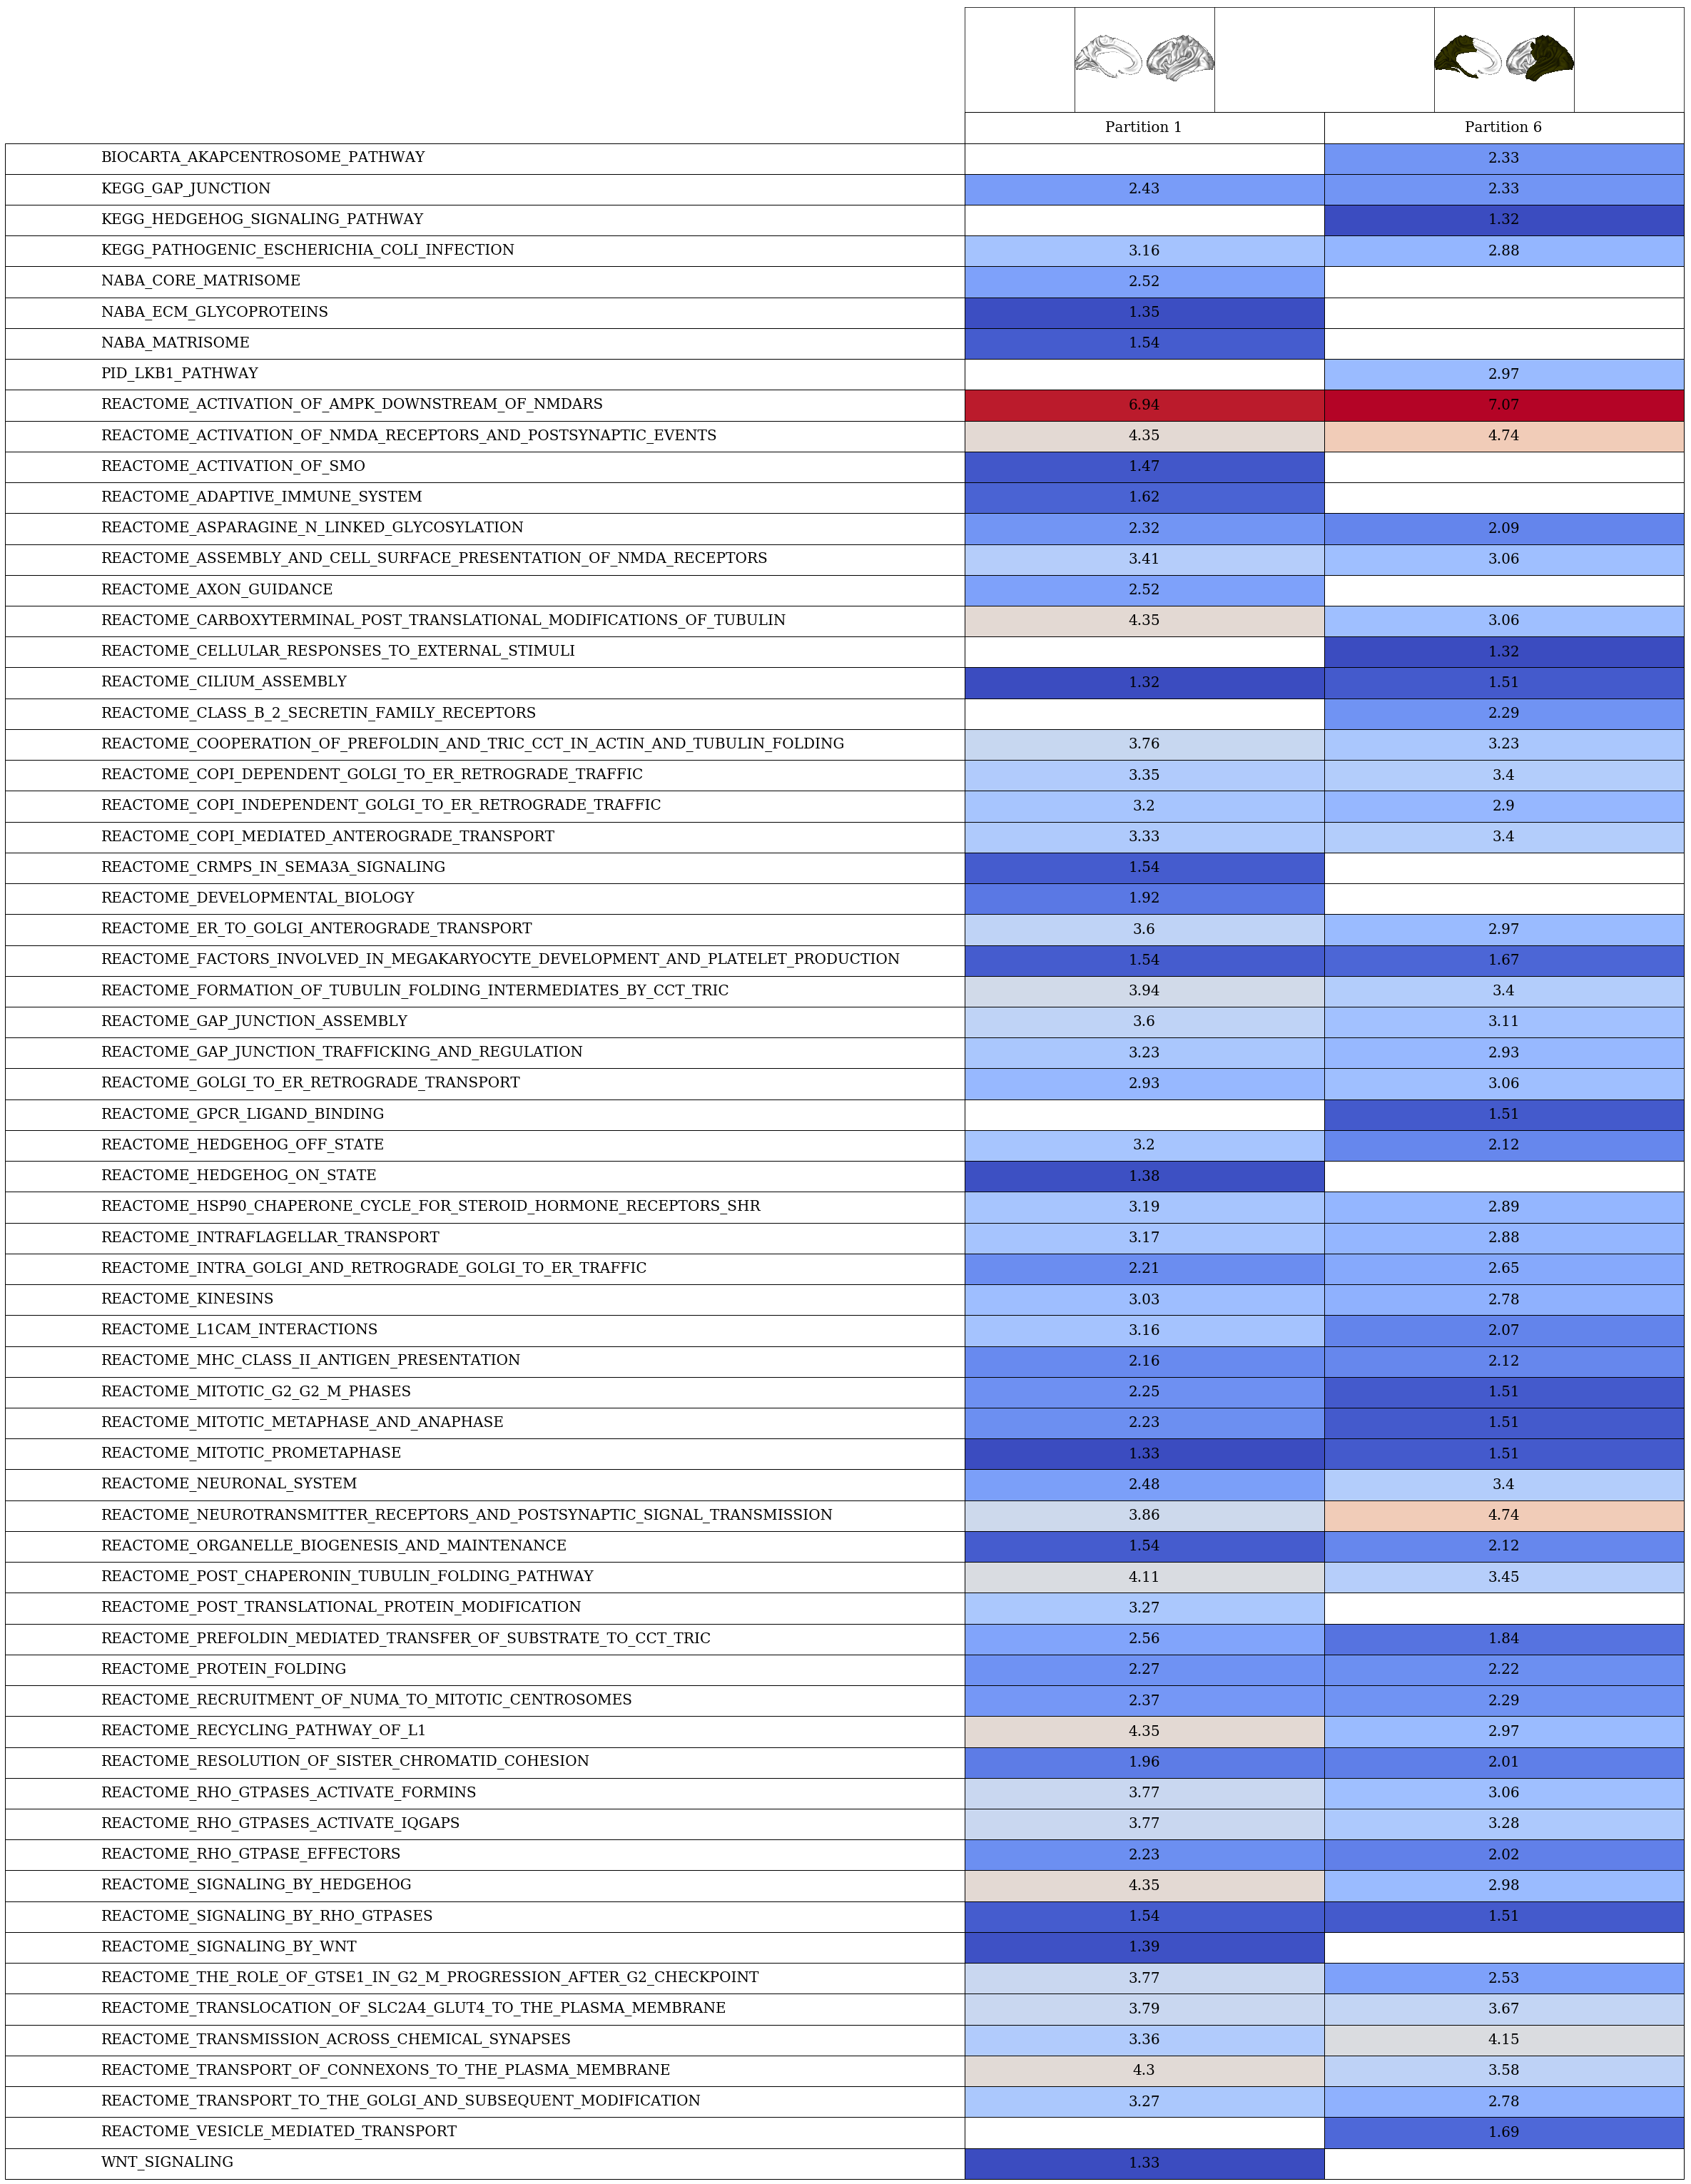

In [12]:
go_cc_fig = create_intensity_table_plot(go_cc_per_partition_df)
go_bp_fig = create_intensity_table_plot(go_bp_per_partition_df)
go_mf_fig = create_intensity_table_plot(go_mf_per_partition_df)
canonical_pathways_fig = create_intensity_table_plot(canonical_pathways_per_partition_df)

In [13]:
deg_df.head()

,Category,GeneSet,N_genes,N_overlap,p,adjP,genes,partition
0,DEG.up,Adipose_Subcutaneous,1871,6,0.666941,1.000000,ENSG00000204291:ENSG00000103264:ENSG0000017080...,1
1,DEG.up,Adipose_Visceral_Omentum,1596,5,0.681961,1.000000,ENSG00000204291:ENSG00000123243:ENSG0000015592...,1
2,DEG.up,Adrenal_Gland,1374,3,0.875389,1.000000,ENSG00000143995:ENSG00000115828:ENSG00000104415,1
3,DEG.up,Artery_Aorta,2391,16,0.009846,0.531705,ENSG00000204291:ENSG00000100592:ENSG0000016561...,1
4,DEG.up,Artery_Coronary,1805,13,0.011413,0.616307,ENSG00000204291:ENSG00000100592:ENSG0000016561...,1


In [21]:
df

,1,4,5,6,7,type
GeneSet,,,,,,
Brain_Cerebellar_Hemisphere,NaN,0.008082,0.000061,0.015283,0.000114,up
Brain_Cerebellum,0.044017,0.031497,0.000094,0.009849,0.000066,up
Artery_Tibial,NaN,NaN,0.029513,NaN,NaN,twoside
Brain_Cerebellar_Hemisphere,NaN,NaN,NaN,NaN,0.010598,twoside
Brain_Cerebellum,NaN,NaN,NaN,NaN,0.009636,twoside
Brain_Hypothalamus,0.027668,NaN,NaN,NaN,NaN,twoside
Esophagus_Gastroesophageal_Junction,0.005916,NaN,NaN,NaN,NaN,twoside
Esophagus_Muscularis,0.017499,NaN,0.004678,NaN,NaN,twoside
Ovary,NaN,NaN,0.013086,NaN,NaN,twoside


In [23]:
deg_df = deg_df.sort_values('adjP').groupby(['GeneSet','partition']).first() # keep only lowest p value type per gene set and partition
deg_per_partition_up_df = deg_df.sort_values('adjP').query('(Category=="DEG.up") & (adjP<0.05)').pivot_table(columns='partition', values='adjP',index='GeneSet')
deg_per_partition_up_df['type'] = 'up'
deg_per_partition_down_df = deg_df.sort_values('adjP').query('(Category=="DEG.down") & (adjP<0.05)').pivot_table(columns='partition', values='adjP',index='GeneSet')
deg_per_partition_down_df['type'] = 'down'
deg_per_partition_twoside_df = deg_df.sort_values('adjP').query('(Category=="DEG.twoside") & (adjP<0.05)').pivot_table(columns='partition', values='adjP',index='GeneSet')
deg_per_partition_twoside_df['type'] = 'twoside'
df = pd.concat([deg_per_partition_up_df,deg_per_partition_twoside_df,deg_per_partition_down_df],axis=0,sort=True)
df.columns = [str(x) for x in df.columns]
df = df.sort_index(axis=1)
df = df.sort_index(axis=0)
df

,1,4,5,6,7,type
GeneSet,,,,,,
Adipose_Visceral_Omentum,0.046140,NaN,NaN,NaN,NaN,down
Artery_Tibial,NaN,NaN,0.029513,NaN,NaN,twoside
Brain_Cerebellar_Hemisphere,NaN,0.008082,0.000061,0.015283,0.000114,up
Brain_Cerebellum,0.044017,0.031497,0.000094,0.009849,0.000066,up
Brain_Hypothalamus,0.027668,NaN,NaN,NaN,NaN,twoside
Cells_Cultured_fibroblasts,NaN,NaN,0.000198,NaN,NaN,down
Esophagus_Gastroesophageal_Junction,0.005916,NaN,NaN,NaN,NaN,twoside
Esophagus_Muscularis,0.017499,NaN,0.004678,NaN,NaN,twoside
Ovary,NaN,NaN,0.013086,NaN,NaN,twoside


In [24]:
labels = np.zeros(df.shape)
labels[df['type']=='up',:] = 1
labels[df['type']=='twoside',:] = 0.5

In [25]:
df

,1,4,5,6,7,type
GeneSet,,,,,,
Adipose_Visceral_Omentum,0.046140,NaN,NaN,NaN,NaN,down
Artery_Tibial,NaN,NaN,0.029513,NaN,NaN,twoside
Brain_Cerebellar_Hemisphere,NaN,0.008082,0.000061,0.015283,0.000114,up
Brain_Cerebellum,0.044017,0.031497,0.000094,0.009849,0.000066,up
Brain_Hypothalamus,0.027668,NaN,NaN,NaN,NaN,twoside
Cells_Cultured_fibroblasts,NaN,NaN,0.000198,NaN,NaN,down
Esophagus_Gastroesophageal_Junction,0.005916,NaN,NaN,NaN,NaN,twoside
Esophagus_Muscularis,0.017499,NaN,0.004678,NaN,NaN,twoside
Ovary,NaN,NaN,0.013086,NaN,NaN,twoside


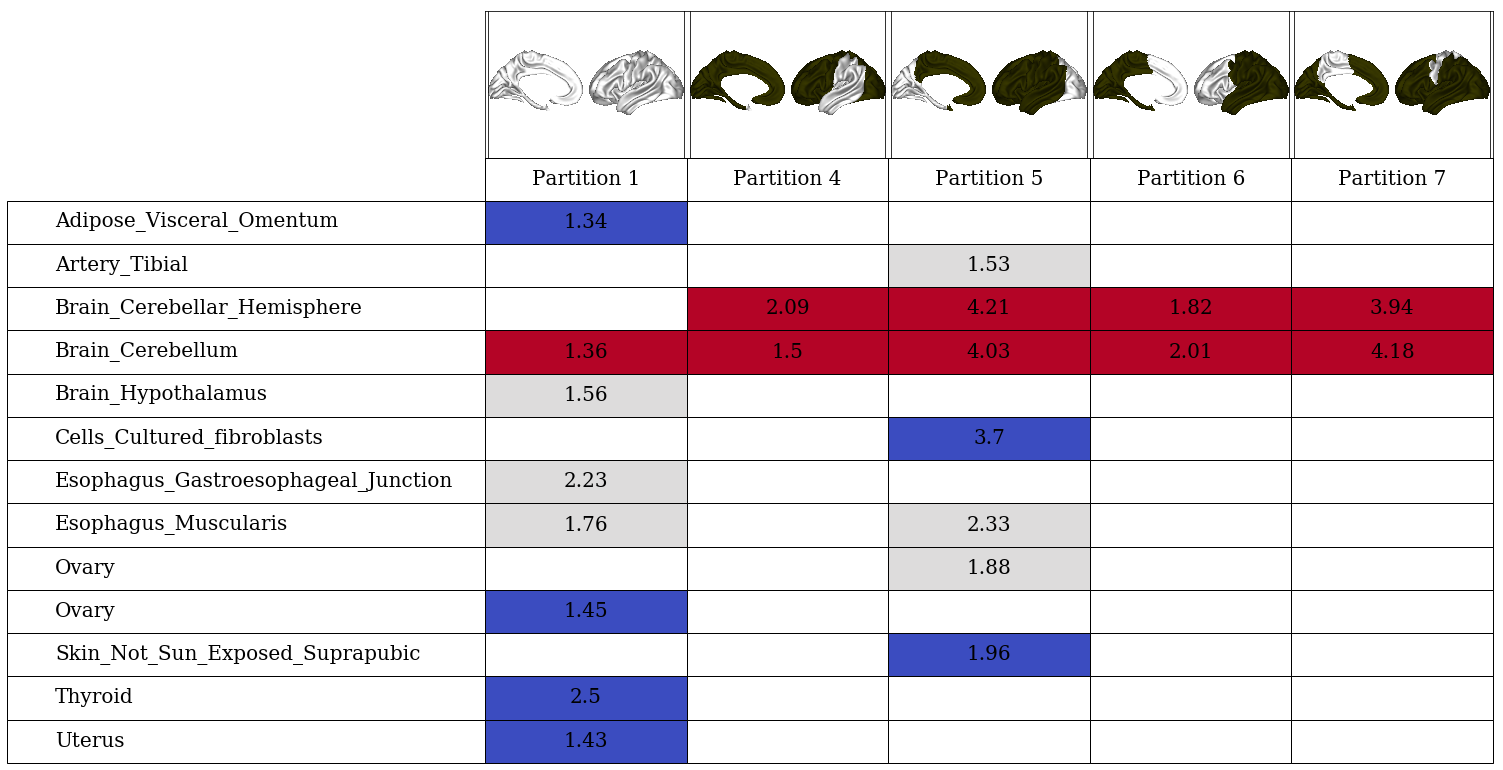

In [26]:
deg_fig = create_intensity_table_plot(df.drop(columns='type'), labels[:,:-1])

In [27]:
import os
OUTPUT_DIR = RESULTS_DIR+'/partitionsSummary/'
os.makedirs(OUTPUT_DIR,exist_ok=True)

deg_fig.savefig(OUTPUT_DIR + 'DEG.svg', bbox_inches="tight")
functions_fig.savefig(OUTPUT_DIR + 'GWASCatalog.svg', bbox_inches="tight")

In [28]:
go_cc_fig.savefig(OUTPUT_DIR + 'GO_cc.svg', bbox_inches="tight")
go_mf_fig.savefig(OUTPUT_DIR + 'GO_mf.svg', bbox_inches="tight")
go_bp_fig.savefig(OUTPUT_DIR + 'GO_bp.svg', bbox_inches="tight")
canonical_pathways_fig.savefig(OUTPUT_DIR + 'canonical_pathways.svg', bbox_inches="tight")